In [63]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import denoising
import utils
import importlib
utils = importlib.reload(utils)
plt.rcParams['text.usetex'] = True


In [64]:
data = np.load("/Users/tsouros/Desktop/ScatteringDenoising/data.npy")
denoised = np.load("/Users/tsouros/Desktop/ScatteringDenoising/image_denoised.npy")
nuisance = np.load("/Users/tsouros/Desktop/ScatteringDenoising/contamination_arr.npy")
nuisance = nuisance.squeeze(axis=2)

In [65]:
print(nuisance.shape)

(100, 2, 384, 384)


In [66]:
data_Q, data_U = data[0,0], data[1,0]
image_Q, image_U = denoised[0], denoised[1]
nuisance_Q, nuisance_U = nuisance[:, 0], nuisance[:, 1]

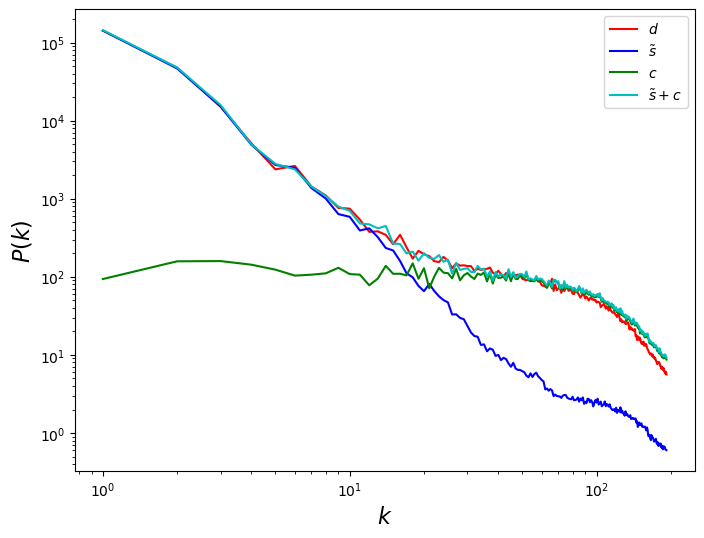

In [99]:
# Plotting all (k, bins) pairs
plt.figure(figsize=(8, 6))

stokes = 'Q'

if stokes == 'Q':
    image = image_Q
    data = data_Q
    nuisance = nuisance_Q[np.random.randint(len(nuisance_Q))]
else:
    image = image_U
    data = data_U
    nuisance = nuisance_U[np.random.randint(len(nuisance_U))]

nx, ny = data.shape
amplitude = 2
spectral_index = -1.7

lam = 0.55
image = denoising.filter_radial(np.array([image]), lambda k: k < nx * lam)
image = image[0]


for x, name, c in zip([data,  image, nuisance, image + nuisance], [r"$d$", r"$\tilde{s}$", r"$c$", r"$\tilde{s} + c$"], ["r", "b", "g", "c"]):
    k, bins = utils.power_spectrum(x)
    plt.loglog(k, bins, label=name, c=c, alpha = 1)
    # plt.xlim(1, 100)


plt.xlabel(r"$k$", fontsize=16)  # Add x-axis label with LaTeX formatting
plt.ylabel(r"$P(k)$", fontsize=16)  # Add x-axis label with LaTeX formatting
# plt.title(fr"$\nu = {nu}$ GHz, method = {method}")

plt.legend()

plt.show()

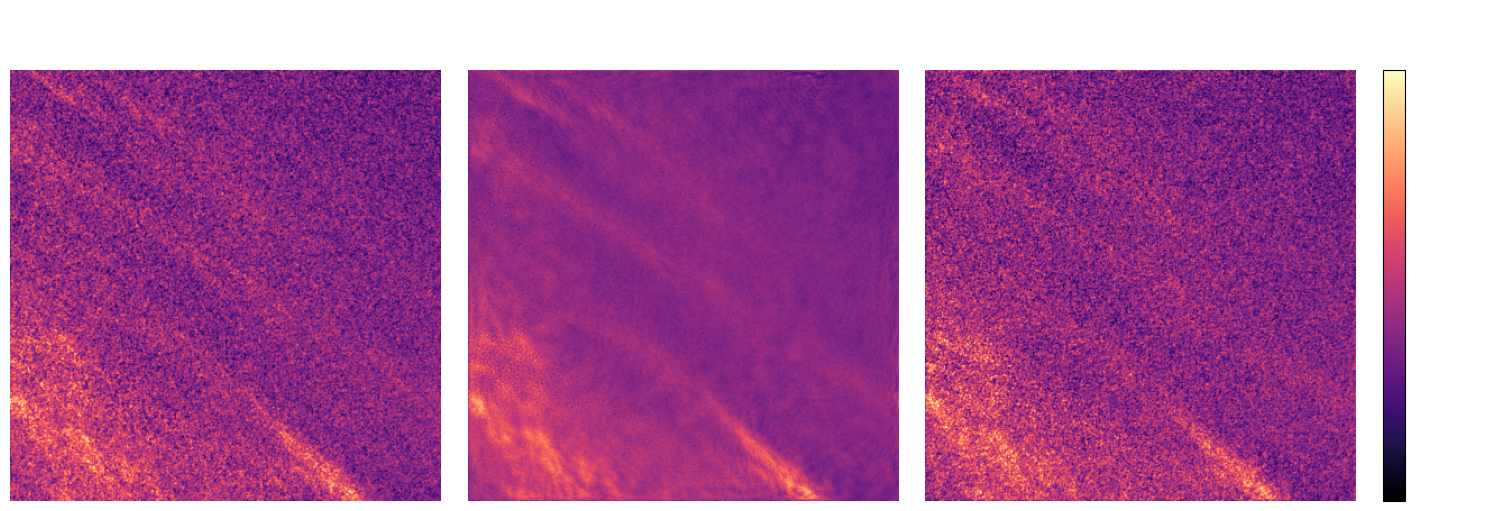

In [100]:
# Enable LaTeX rendering in Matplotlib
plt.rcParams['text.usetex'] = True

cmap = 'magma'
color = 'white'

# Compute vmin and vmax across all images
vmin = min(data.min(), image.min(), (image + nuisance).min())
vmax = max(data.max(), image.max(), (image + nuisance).max())

# Create a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

# Set figure background to transparent
fig.patch.set_alpha(0)

# Plot each image with the same color scale
im0 = axes[0].imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
axes[0].set_title(r'$d$', fontsize=16, color=color)

im1 = axes[1].imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
axes[1].set_title(r'$\tilde{s}$', fontsize=16, color=color)

im2 = axes[2].imshow(image + nuisance, cmap=cmap, vmin=vmin, vmax=vmax)
axes[2].set_title(r'$\tilde{s} + c$', fontsize=16, color=color)

# Remove axis ticks
for ax in axes:
    ax.axis('off')

# Add a common colorbar
cbar = fig.colorbar(im2, ax=axes, orientation="vertical", fraction=0.025, pad=0.02)
cbar.set_label(r"$MJy/sr$", fontsize=20, color=color)

# Set colorbar text to white
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color=color)

plt.rcParams['text.usetex'] = False

fig.suptitle(fr'Stokes-${stokes}$', fontsize=20, color='white')

plt.show()